<a href="https://colab.research.google.com/github/varunraisinghal/CSE151A-MachineLearningFinalProject/blob/main/CSE151A_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Final Project

### Team Members

| Name    | Email Address      | Major                  | Pronouns |
|---------|--------------------|------------------------|----------|
| Amit    | anamburi@ucsd.edu  | Computer Science       | He/him   |
| Varun   | vsinghal@ucsd.edu  | Computer Science       | He/Him   |
| Eric    | e7tran@ucsd.edu    | Computer Science       | He/Him   |
| Brian   | bwlee@ucsd.edu     | ECE Computer Engineering | N/A    |
| Thomas  | tjoel@ucsd.edu     | Computer Science       | He/him   |
| Jerry   | jsxu@ucsd.edu      | Computer Science       | He/him   |
| Jason   | jsliang@ucsd.edu   | Computer Engineering   | He/him   |
| Desiree | dalcanta@ucsd.edu  | Computer Science       | She/her  |
| Kenry   | yay023@ucsd.edu    | Computer Science       | He/him   |


## Exploratory Data Analysis

# Exploratory Data Analysis: Spotify 2023 Dataset

The Spotify 2023 dataset contains information about tracks on Spotify for the year 2023, including various metrics and features that describe the musical and popularity characteristics of each track.

## Dataset Overview

- **Total Entries:** 953 tracks
- **Columns:** 24

### Key Columns

- `track_name`: The name of the track.
- `artist(s)_name`: The artist(s) name for the track.
- `artist_count`: The number of artists for each track.
- `released_year`, `released_month`, `released_day`: Release date information.
- `in_spotify_playlists`, `in_spotify_charts`, `streams`: Spotify-related metrics.
- `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`: Metrics related to other streaming platforms.
- `bpm`: Beats per minute, indicating the tempo of the track.
- `key`, `mode`: Musical key and mode of the track.
- Various metrics in percentages (`danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`): Features representing the musical characteristics of each track.

### Observations

- Some columns have missing values (`in_shazam_charts`, `key`), which may require data imputation depending on the analysis or model building.
- The dataset contains a wide range of musical characteristics, indicating a diverse set of tracks.

## Analysis Steps

1. **Handling Missing Values:** Determine the best strategy for dealing with missing data (e.g., imputation, removal).
2. **Categorical Data Analysis:** Explore the distributions of categorical variables such as `artist(s)_name`, `key`, `mode`.
3. **Numerical Data Analysis:** Investigate the distributions of numerical features, identify any outliers, and understand the spread of data.
4. **Correlations:** Examine the relationships between numerical features, especially how different musical characteristics correlate with each other and with popularity metrics like streams and chart positions.
5. **Visualization:** Create various visualizations (histograms, scatter plots, box plots) to better understand the data distribution and the relationships between different variables.


Analysis of Spotify 2023 dataset provides insights into the musical and popularity dynamics of tracks on Spotify. This analysis can help identify trends, preferences, and the impact of various musical features on popularity metrics.


#### Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset


In [12]:
!wget https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv

spotify_data = pd.read_csv('spotify-2023.csv', encoding='latin1')

# file_path = 'spotify-2023.csv'
# spotify_data = pd.read_csv(file_path, encoding='latin1')

--2024-02-05 00:59:42--  https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106270 (104K) [text/plain]
Saving to: ‘spotify-2023.csv.1’

spotify-2023.csv.1  100%[===================>] 103.78K  --.-KB/s    in 0.02s   

2024-02-05 00:59:42 (4.59 MB/s) - ‘spotify-2023.csv.1’ saved [106270/106270]



#### Pre Processing Data

In [13]:
missing_values = spotify_data.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [14]:
# Data Imputation

In [15]:
# shazam charts to 0 if null
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].fillna(0)

# dropping key for now as it doesn't help that much
spotify_data.drop('key', axis = 1);

spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


#### Histograms Distribution Pattern

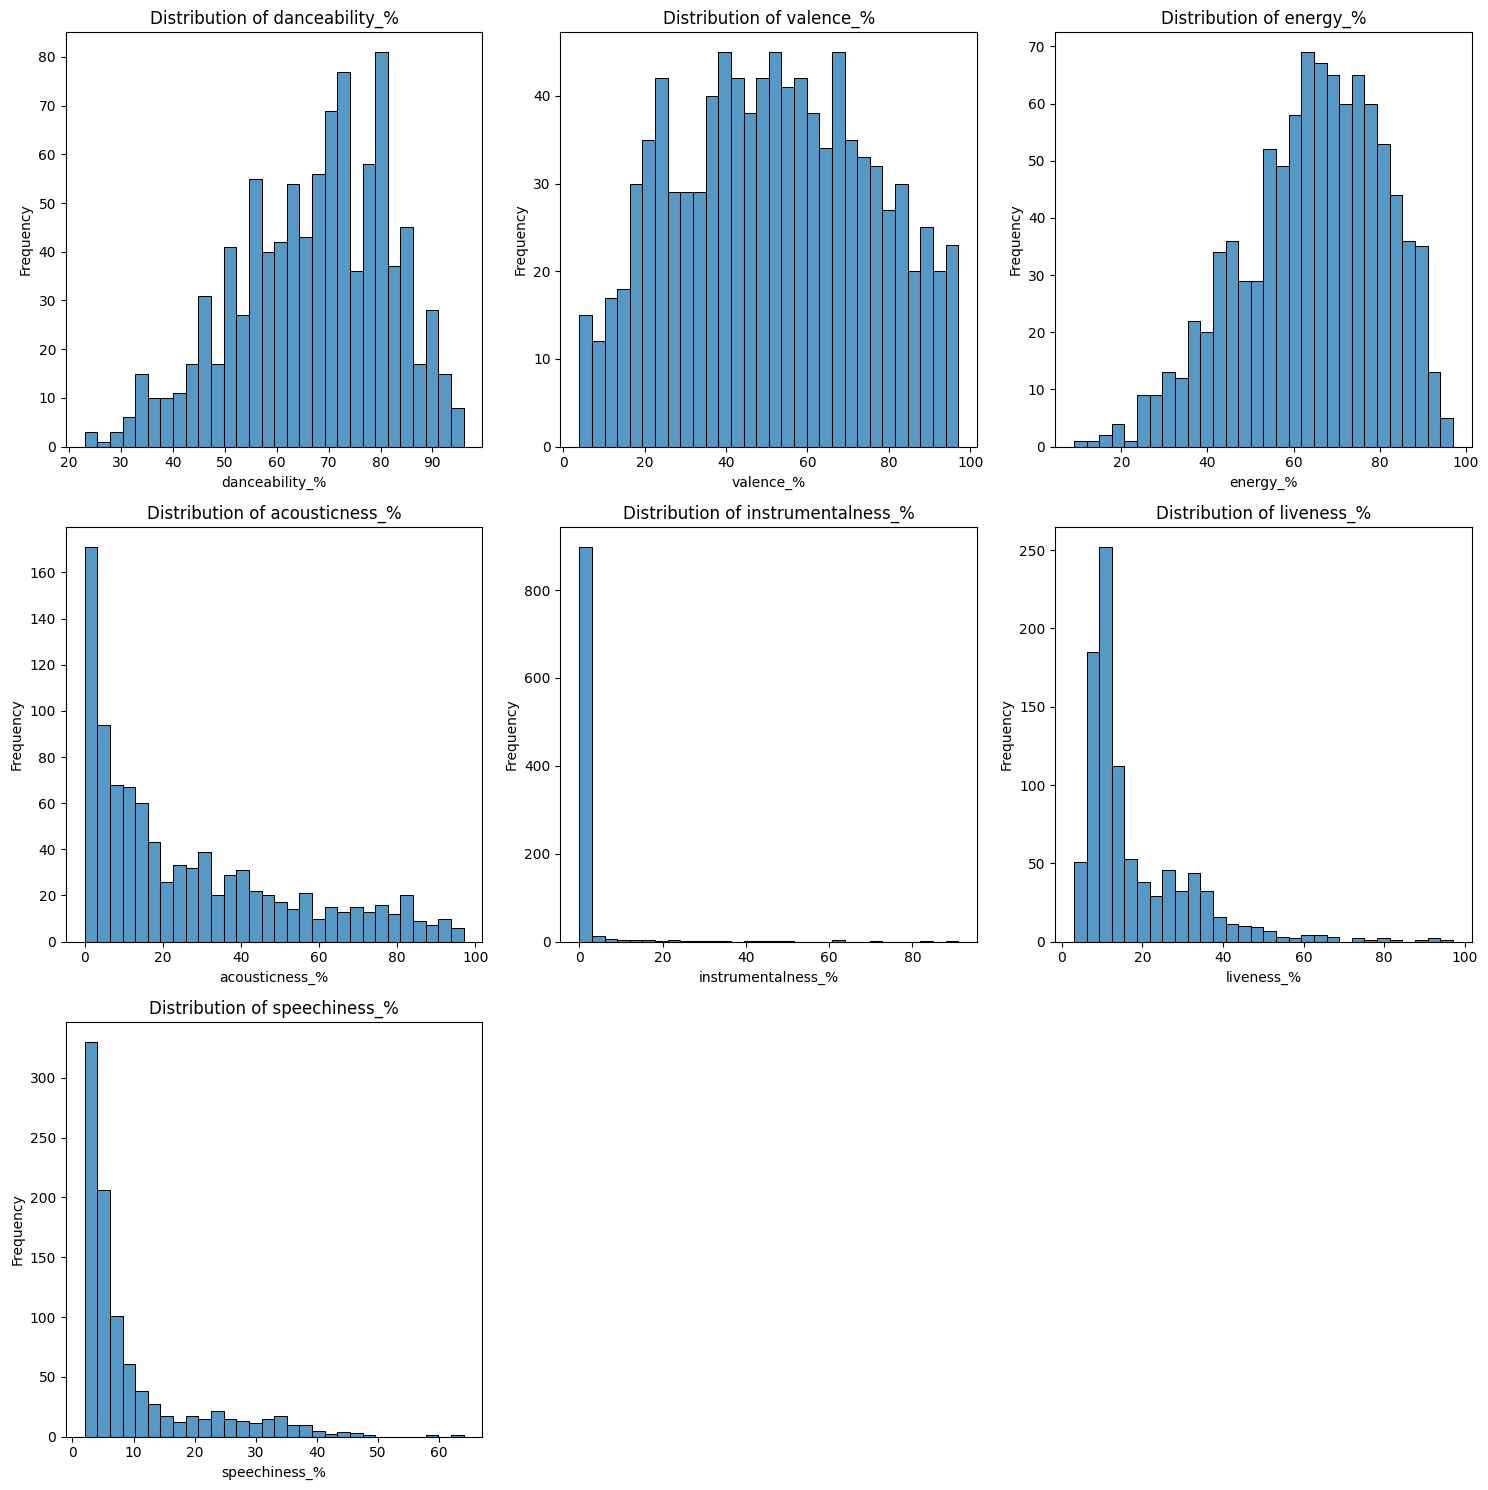

In [16]:
features = [
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(spotify_data[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for ax in axes[len(features):]:
    fig.delaxes(ax)


plt.tight_layout()
plt.show()


#### Heatmap

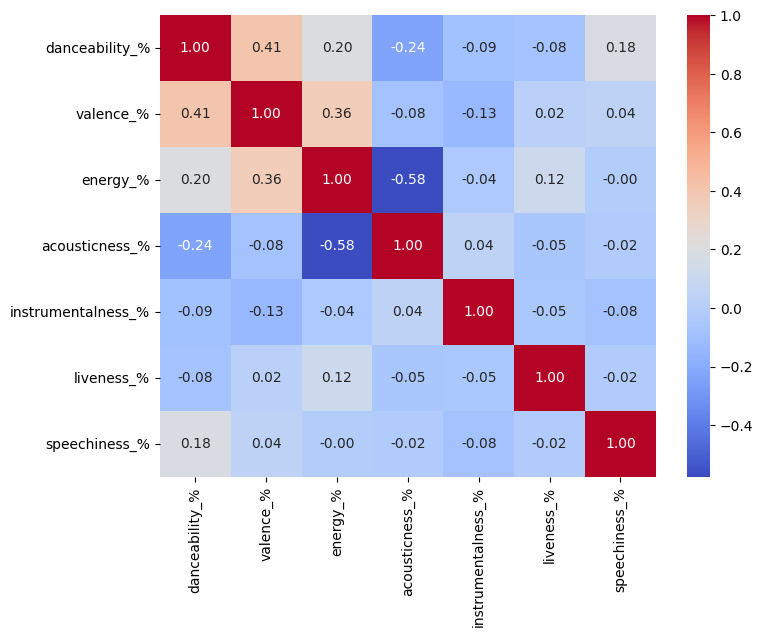

In [17]:
corr = spotify_data[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

#### Pairplot

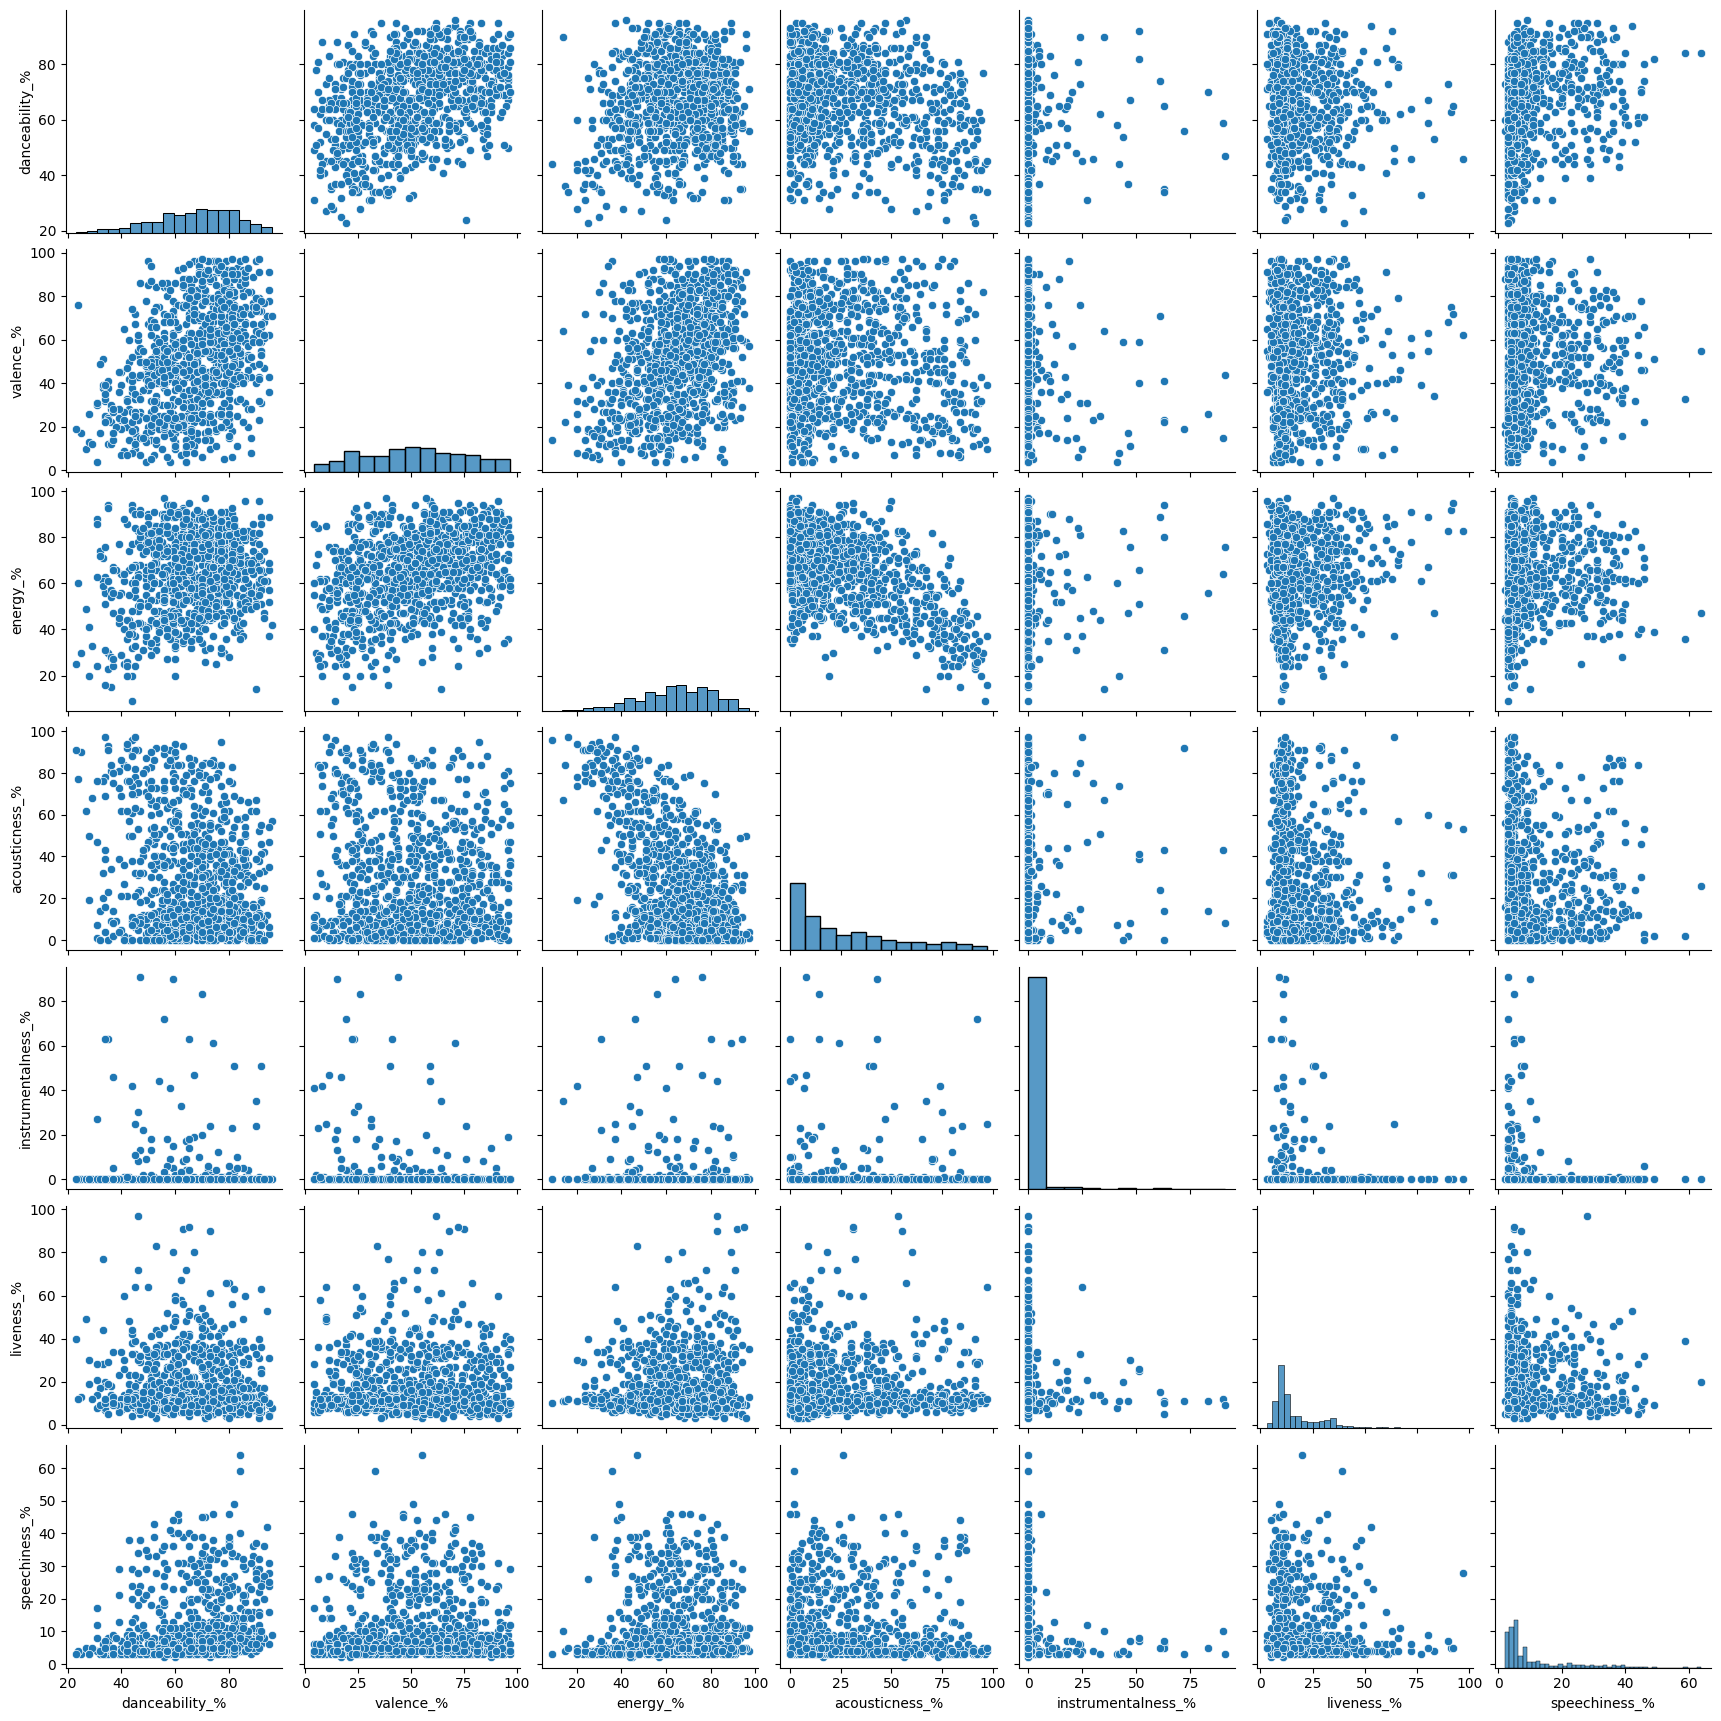

In [18]:
sns.pairplot(spotify_data[features])
plt.show()